### Sprint3 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:


class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
 

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        m,n = X.shape
        
        if self.no_bias==True:
            self.theta = np.zeros(n) 
            self.theta = self.theta.reshape(-1,1)
            X = X
            self.y = y
            
        if self.no_bias==False:
            theta = np.zeros(n+1) 
            self.theta = theta.reshape(-1,1)
            ones = np.ones((m,1))
            X = np.hstack([ones,X])
            self.y = y
            
        for i in range(self.iter):
            error = self._linear_hypothesis(X)-y
            self.theta = self._gradient_descent(X,error)
            j_theta = self._cost_function(self._linear_hypothesis(X), y)
            self.loss[i] = j_theta
            if self.verbose:
                print("{}回目：{}".format(i+1,j_theta) ) #verboseをTrueにした際は学習過程を出力 
            else:
                pass
            if X_val is not None and y_val is not None:
                pred = self.predict(X_val)
                j_theta_val = self._cost_function(pred, y_val)
                self.val_loss[i] = j_theta_val
            
    def predict(self, X):
        """
        線形回帰を使い推定する。
        _gradient_descent で求めた w を使い 仮定関数 h を求める。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        m,n = X.shape
        
        # bias無しの場合はX_0を追加せずpass
        if self.no_bias:
            pass
        # bias有りの場合はX_0 = 1をXにconcat
        else:
            bias = np.ones(m).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)        
       
        h = np.dot(X,self.theta) 
        return h
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """
        h = np.dot(X,self.theta)
        return h

    def _gradient_descent(self, X, error):
        """
        各特徴量に相当するw（j）を計算する

        """
        
        m,n = X.shape 
   
        sigma = np.zeros((m,1))
        for j in range(n):
            for i in range(m):
                sigma[j] = sigma[j]+(self._linear_hypothesis(X)[i]-self.y[i])*X[i][j]
            self.theta[j] = self.theta[j]-self.lr/m*sigma[j]
        return self.theta

    def _cost_function(self, pred, y):
        """
        目的関数の計算

        Parameters
        ----------
        pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
          numpy.float
          平均二乗誤差
        """
        return np.sum((pred - y)**2) / (2*len(y))    

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$

ベクトル表記
$$
h_\theta(x) = \theta^T \cdot x.
$$

雛形

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています



    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """
  
        

        h = np.dot(X,self.theta)
        return h
        


### 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

雛形

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。


    def _gradient_descent(self, X, error):
        """
        各特徴量に相当するw（j）を計算する

        """
        
        m,n = X.shape 
   
        sigma = np.zeros((m,1))
        for j in range(n):
            for i in range(m):
                sigma[j] = sigma[j]+(self._linear_hypothesis(X)[i]-self.y[i])*X[i][j]
            self.theta[j] = self.theta[j]-self.lr/m*sigma[j]
        return self.theta
        
    

### 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 hθ(x)　の出力が推定結果です。

    def predict(self, X):
        """
        線形回帰を使い推定する。
        _gradient_descent で求めた w を使い 仮定関数 h を求める。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        m,n = X.shape
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
        h = np.dot(X,self.theta) 

### 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    return np.sum((y_pred - y)**2) / len(y)

### 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。
 
 $$
 J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
 $$

    def _cost_function(self, pred, y):
    """
    目的関数の計算

    Parameters
    ----------
    pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
      numpy.float
      平均二乗誤差
    """

    return np.sum((pred - y)**2) / (2*len(y))  

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。



In [4]:


df = pd.read_csv('train.csv')
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']
X = np.array(X)
y = np.log(y)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=1)

ss_X = StandardScaler()
ss_X.fit(X_train)

X_train = ss_X.transform(X_train)
X_test = ss_X.transform(X_test)

In [5]:
Scrach = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=True)

In [6]:
Scrach.fit(X_train,y_train,X_test,y_test)

1回目：68592.0209058474
2回目：55579.141815784285
3回目：45039.98224944585
4回目：36504.35089823728
5回目：29591.422295629436
6回目：23992.752110068803
7回目：19458.520526941487
8回目：15786.390180623439
9回目：12812.481712683031
10回目：10404.064481279302
11回目：8453.636443283936
12回目：6874.1291871869735
13回目：5595.02427523933
14回目：4559.207695961465
15回目：3720.422146017024
16回目：3041.20352180969
17回目：2491.209595201939
18回目：2045.8663376221905
19回目：1685.2715225936963
20回目：1393.306710180608
21回目：1156.9180097132912
22回目：965.5335438728292
23回目：810.5916334570616
24回目：685.1586597904777
25回目：583.6195609771935
26回目：501.42715737766594
27回目：434.89912526694366
28回目：381.0535626014859
29回目：337.4758119438809
30回目：302.2105996209556
31回目：273.67467928503396
32回目：250.58608256015563
33回目：231.90682016565478
34回目：216.79647684901127
35回目：204.57462938131908
36回目：194.69041044073077
37回目：186.697859982463
38回目：180.2359638836018
39回目：175.01248877064415
40回目：170.79089131309823
41回目：167.37971745074748
42回目：164.62401813327682
43回目：162.39839814398883


In [7]:
pred = Scrach.predict(X_test)
print("スクラッチモデルのMSE：{:.3g}".format(MSE(pred, y_test)))

スクラッチモデルのMSE：83.3


In [8]:
# sklearnモデルの学習と推定
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sklearn_model = LinearRegression()

sklearn_model.fit(X_train, y_train)

sklearn_pred = sklearn_model.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_pred)

print("sklearnモデルのMSE：{:.3g}".format(sklearn_mse))

sklearnモデルのMSE：0.0453


Text(0.5, 1.0, 'pred of Scrach & sklearn')

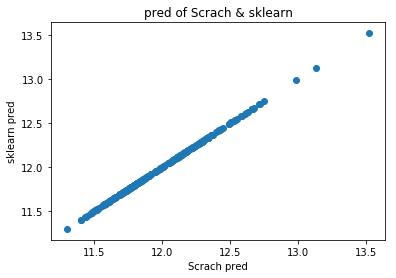

In [9]:
plt.scatter(pred,sklearn_pred)
plt.xlabel("Scrach pred")
plt.ylabel("sklearn pred")
plt.title("pred of Scrach & sklearn")

**Scrach　と　sklearnでの予測値をそれぞれ上記の通りグラフ化するとy=x線上のため、同様の学習による予測をしていると考えられる。**

### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

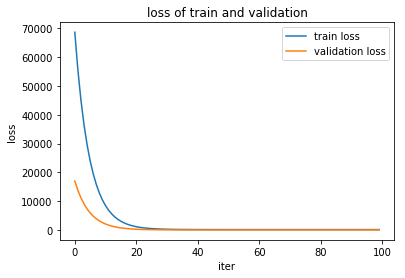

In [10]:
plt.plot(Scrach.loss,label="train loss")
plt.plot(Scrach.val_loss,label="validation loss")
plt.title("loss of train and validation")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()

### 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 θ0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [11]:
Scrach = ScratchLinearRegression(num_iter=100, lr=0.001, no_bias=True, verbose=True)

In [12]:
Scrach.fit(X_train,y_train,X_test,y_test)

1回目：84659.14707692135
2回目：84659.14733990982
3回目：84659.14777746073
4回目：84659.14838895129
5回目：84659.14917376073
6回目：84659.15013126995
7回目：84659.1512608614
8回目：84659.15256191959
9回目：84659.15403383027
10回目：84659.15567598135
11回目：84659.15748776206
12回目：84659.1594685637
13回目：84659.16161777891
14回目：84659.16393480217
15回目：84659.16641902975
16回目：84659.16906985943
17回目：84659.17188669075
18回目：84659.17486892478
19回目：84659.17801596454
20回目：84659.18132721451
21回目：84659.18480208072
22回目：84659.1884399711
23回目：84659.19224029516
24回目：84659.19620246404
25回目：84659.20032589034
26回目：84659.20460998853
27回目：84659.20905417467
28回目：84659.21365786642
29回目：84659.21842048292
30回目：84659.22334144531
31回目：84659.22842017592
32回目：84659.23365609888
33回目：84659.23904864004
34回目：84659.24459722659
35回目：84659.25030128763
36回目：84659.25616025348
37回目：84659.26217355636
38回目：84659.26834063002
39回目：84659.27466090977
40回目：84659.2811338324
41回目：84659.28775883635
42回目：84659.29453536165
43回目：84659.30146284988
44回目：84659.30854074424
4

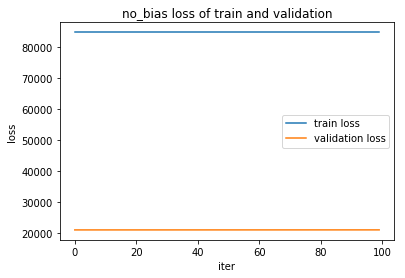

In [13]:
plt.plot(Scrach.loss,label="train loss")
plt.plot(Scrach.val_loss,label="validation loss")
plt.title("no_bias loss of train and validation")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()

バイアス項がないと目的関数は減少しづらい。これは、バイアス項がないと常にグラフの原点を通るため、目的変数を予測する適用能力が低いためと考えられる。また、適用した場合でも、過度に訓練データにフィットする過学習になる可能性もある。

### 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [21]:
X2_train = X_train**2
X2_test = X_test**2

X3_train = X_train**3
X3_test = X_test**3

Scrach = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=False)
Scrach2 = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=False)
Scrach3 = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=False)

Scrach.fit(X_train,y_train,X_test,y_test)
Scrach2.fit(X2_train,y_train,X2_test,y_test)
Scrach3.fit(X3_train,y_train,X3_test,y_test)

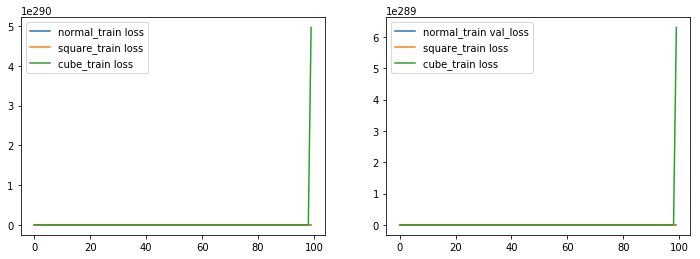

In [22]:

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(Scrach.loss,label="normal_train loss")
ax[0].plot(Scrach2.loss,label="square_train loss")
ax[0].plot(Scrach3.loss,label="cube_train loss")

ax[1].plot(Scrach.val_loss,label="normal_train val_loss")
ax[1].plot(Scrach2.val_loss,label="square_train loss")
ax[1].plot(Scrach3.val_loss,label="cube_train loss")

ax[0].legend()
ax[1].legend()

1乗や２乗は　num_iter=100, lr=0.1　の条件で目的関数は減少していることを確認できたが、3乗は発散してしまった。
そのため、条件の学習率を変更しnum_iter=100、lr=0.001で実施する。

In [24]:
X2_train = X_train**2
X2_test = X_test**2

X3_train = X_train**3
X3_test = X_test**3

Scrach2 = ScratchLinearRegression(num_iter=100, lr=0.001, no_bias=False, verbose=False)
Scrach3 = ScratchLinearRegression(num_iter=100, lr=0.001, no_bias=False, verbose=False)

Scrach2.fit(X2_train,y_train,X2_test,y_test)
Scrach3.fit(X3_train,y_train,X3_test,y_test)

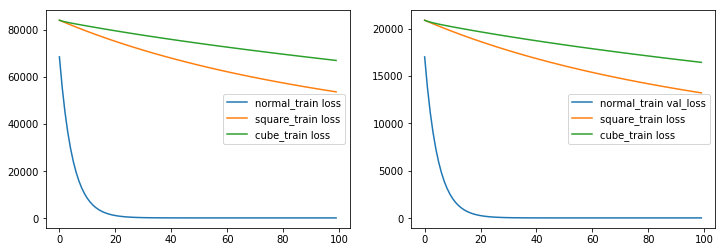

In [25]:

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(Scrach.loss,label="normal_train loss")
ax[0].plot(Scrach2.loss,label="square_train loss")
ax[0].plot(Scrach3.loss,label="cube_train loss")

ax[1].plot(Scrach.val_loss,label="normal_train val_loss")
ax[1].plot(Scrach2.val_loss,label="square_train loss")
ax[1].plot(Scrach3.val_loss,label="cube_train loss")

ax[0].legend()
ax[1].legend()

num_iter=100、lr=0.001のように学習率を小さくしたものであると発散せずに現象していくことが確認できた。
結果、特徴量が2乗、３乗と分散が大きくなる場合、学習率を小さくする必要がある。
また、目的関数が収束するためのイテレーション数も大きくする必要がある）
（以下は参考としてイテレーション数を増やしnum_iter=1000、lr=0.001 で実施した。）

In [27]:
Scrach2 = ScratchLinearRegression(num_iter=1000, lr=0.001, no_bias=False, verbose=False)
Scrach3 = ScratchLinearRegression(num_iter=1000, lr=0.001, no_bias=False, verbose=False)

Scrach2.fit(X2_train,y_train,X2_test,y_test)
Scrach3.fit(X3_train,y_train,X3_test,y_test)

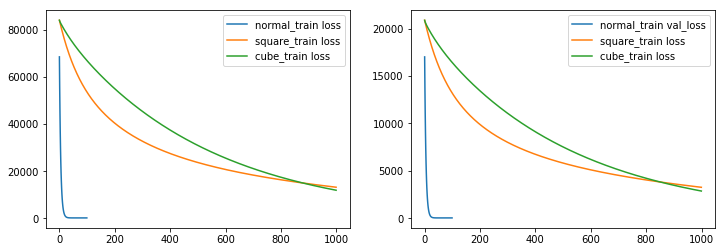

In [28]:

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(Scrach.loss,label="normal_train loss")
ax[0].plot(Scrach2.loss,label="square_train loss")
ax[0].plot(Scrach3.loss,label="cube_train loss")

ax[1].plot(Scrach.val_loss,label="normal_train val_loss")
ax[1].plot(Scrach2.val_loss,label="square_train loss")
ax[1].plot(Scrach3.val_loss,label="cube_train loss")

ax[0].legend()
ax[1].legend()

イテレーション数を増やしnum_iter=1000、lr=0.001 では、ある程度目的関数が減少していることが確認できた。
（傾向が理解できたため、これ以上のイテレーション増加はPCスペックのため省略）

### 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$


偏微分では、その関数を各々指定された　$${\partial \theta_j} $$ で微分する。
その際に各々の \theta との係数である $${x^{(i)}}$$ が外に出るため以下となる。


$$
\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1 }{ 2m} 2  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x^{(i)}.
$$

$$
\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1 }{ m}   \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x^{(i)}.
$$

上記を以下に代入することで式が得られる。

$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

### 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

線形回帰では目的関数に平均二乗誤差を用いるため、原則として最適解は一つである。平均二乗誤差は凸関数の曲線を描いており（下記参照）、各特徴量$\theta$において最小値は一つのみ観測される。

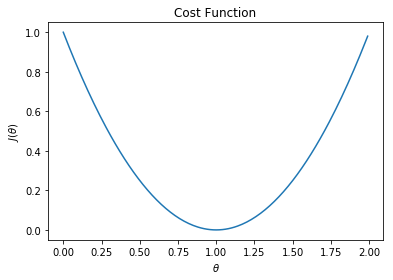

In [29]:
# 平均二乗誤差のグラフ化
theta = np.arange(0,2,0.01)
J_theta = (1-theta)**2   # xとyに適当な数値を代入
plt.plot(theta, J_theta) 
plt.title("Cost Function")
plt.xlabel("$\\theta$")
plt.ylabel("$J(\\theta)$")
plt.show()